In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyFAI
import os
from PIL import Image
import scipy.integrate as integrate
from SACLA_XRD_functions import *
# import tifffile as tif
# %matplotlib widget
%load_ext autoreload
%autoreload 2

In [59]:
run_number = 1621011
preshot_number = run_number - 1
im_fpd1, im_fpd1_preshot = get_XRD_shot_preshot(run_number, preshot_number, plot=False)

In [60]:
# img = Image.fromarray(im_fpd1)
# img.save(f"run_{run_number}.tiff")

In [61]:
# From here should be the same
# fpd1_map = np.load('fpd1_map.npy')
fpd1_map = np.ones_like(im_fpd1)

# fpd1_mask = np.load('fpd1_mask.npy')
fpd1_mask = np.load('run_1620771_mask.npy')

In [62]:
fpd1_PONI = pyFAI.load('run_1620787_7.065keV.poni')
# fpd1_PONI = pyFAI.load('fpd1_r35.poni')  # Put new poni files in here

In [63]:
# Number of scattering angle bins
npt_rad = 2000
# Number of azimuthal angle bins
npt_azim = 360
# Range for the integration in 2 theta or A^-1
radial_range = [1.5, 5]  # I suggest [0, 90] or [0,15] when changing units
# Range for the integration in azimuth
azim_range = [15, 160]
# Units of the integration    Either "2th_deg" or "q_A^-1"  You need to change the radial rangne values as well as the string below
units="q_A^-1"

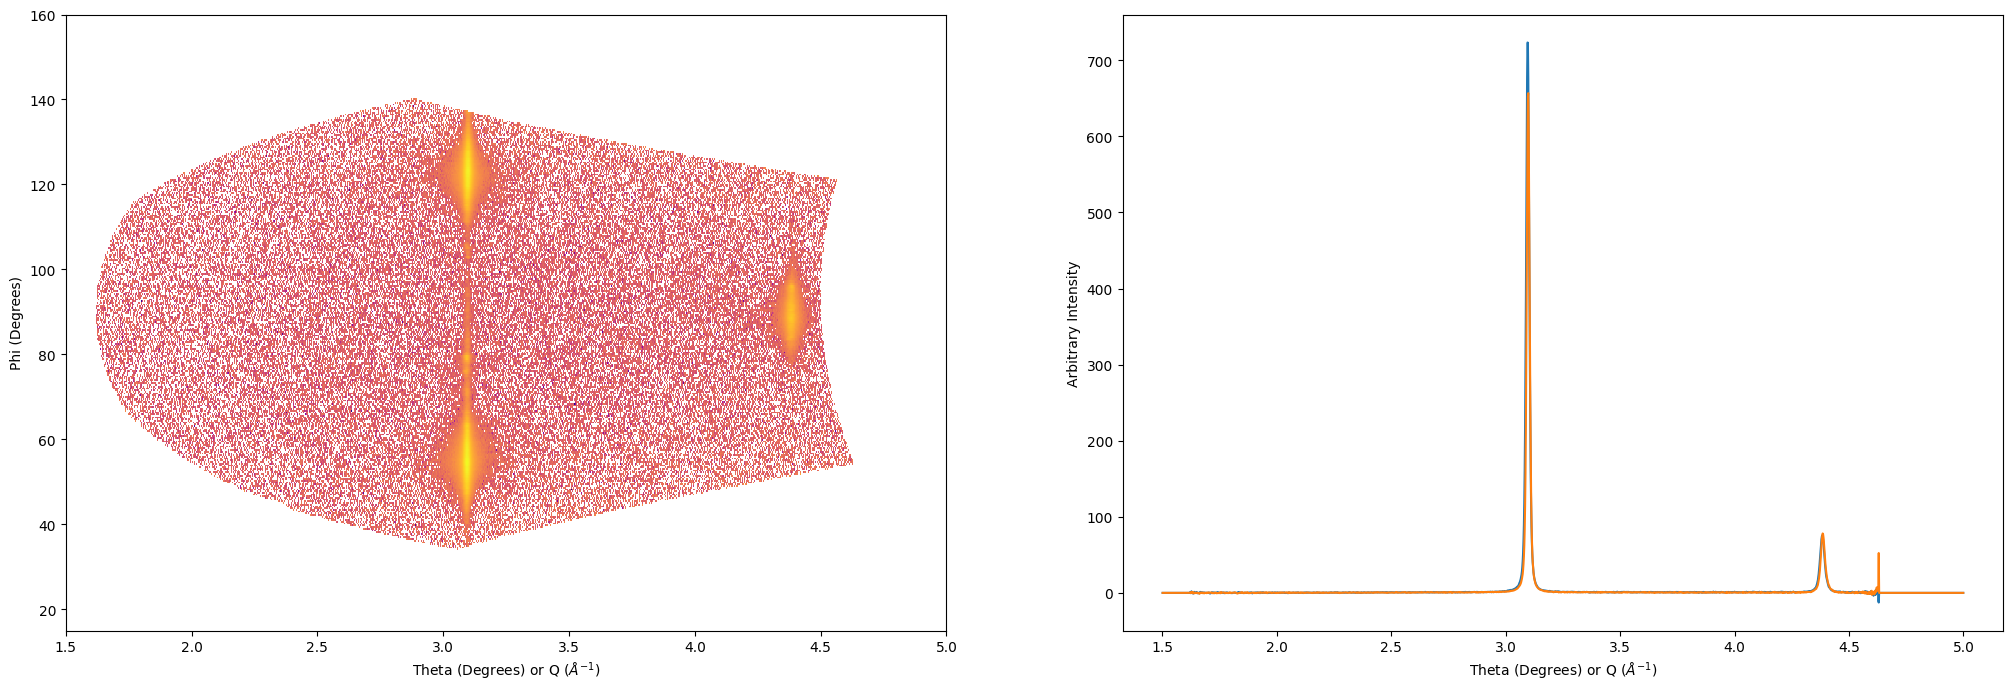

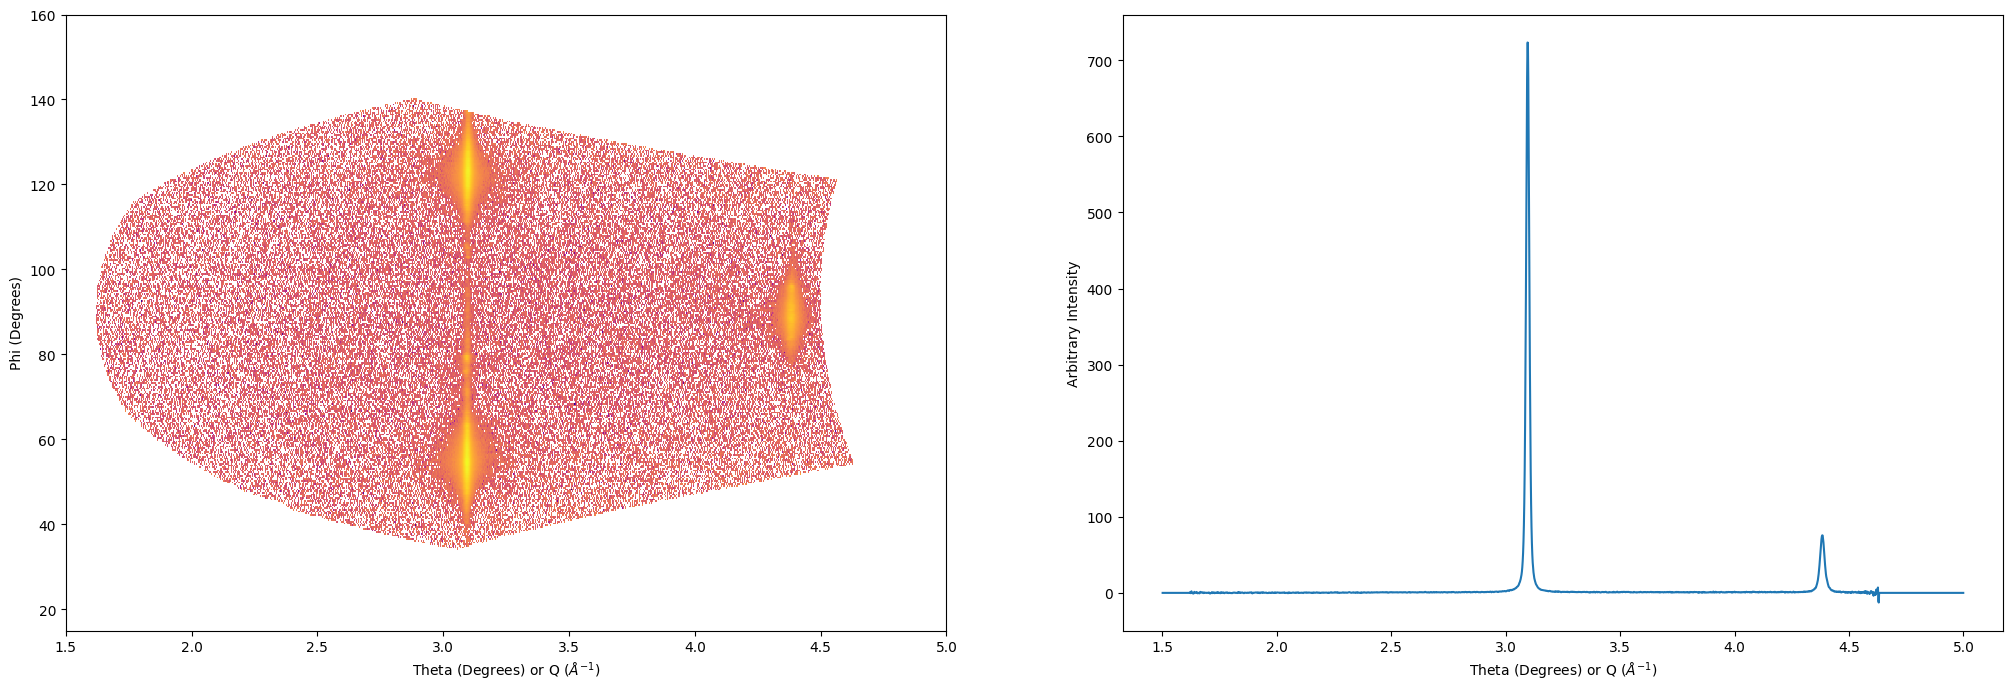

In [64]:
# pyFAI integration for VAREX 1
fpd1_CAKE = fpd1_PONI.integrate2d_ng(im_fpd1 * fpd1_map, npt_rad, npt_azim, azimuth_range=azim_range, radial_range=radial_range, correctSolidAngle=True, polarization_factor=1, unit=units, mask=fpd1_mask)
fpd1_INT = fpd1_PONI.integrate1d_ng(im_fpd1 * fpd1_map, npt_rad, azimuth_range=azim_range, radial_range=radial_range, correctSolidAngle=True, polarization_factor=1, unit=units, mask=fpd1_mask)

fpd1_INT_preshot = fpd1_PONI.integrate1d_ng(im_fpd1_preshot * fpd1_map, npt_rad, azimuth_range=azim_range, radial_range=radial_range, correctSolidAngle=True, polarization_factor=1, unit=units, mask=fpd1_mask)

plot_with_preshot(fpd1_CAKE, fpd1_INT, fpd1_INT_preshot)
plot(fpd1_CAKE, fpd1_INT)